In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("ExportData.csv",sep = ';')
data

,ChurnKey,CustomerKey,DateKey,LocalisationKey,ServiceKey,CustomerID,Gender,Age,MaritalStatus,City,State,MonthlyCharge,Contrat,PaymentMethod,Satisfaction_score,ChurValue,CustomerStatus,ChurnScore,ChurnCategory,CLTV,PhoneService,MultipleLines,InternetService,InternetType,StreamingTV,StreamingMovies,StreamingMusic,OnlineSecurity,DeviceProtection,SubscriptionDate,SubsciptionMonths,SubscriptionQuarter,ChurnDate
0,1,1,1194,770,4007,0002-ORFBO,Female,37,Yes,Frazier Park,California,"65,599998474121094",One Year,Credit Card,3,0,Stayed,65,NaN,2205,1,0,1,Cable,1,0,0,0,0,2020-04-05,4,Q2,NaN
1,2,2,1192,871,4789,0003-MKNFE,Male,46,No,Glendale,California,"59,900001525878906",Month-to-Month,Credit Card,5,0,Stayed,66,NaN,5414,1,1,1,Cable,0,1,1,0,0,2020-04-03,4,Q2,NaN
2,3,3,1196,1161,1902,0004-TLHLJ,Male,50,No,Costa Mesa,California,"73,900001525878906",Month-to-Month,Bank Withdrawal,1,1,Churned,71,Competitor,4479,1,0,1,Fiber Optic,0,0,0,0,1,2020-04-07,4,Q2,2020-09-15
3,4,4,1231,331,396,0011-IGKFF,Male,78,Yes,Martinez,California,98,Month-to-Month,Bank Withdrawal,1,1,Churned,91,Dissatisfaction,3714,1,0,1,Fiber Optic,1,1,0,0,1,2020-05-12,5,Q2,2020-07-13
4,5,5,1189,221,369,0013-EXCHZ,Female,75,Yes,Camarillo,California,"83,900001525878906",Month-to-Month,Credit Card,1,1,Churned,68,Dissatisfaction,3464,1,0,1,Fiber Optic,1,0,0,0,0,2020-03-31,3,Q1,2020-09-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,7039,1168,751,4864,9987-LUTYD,Female,20,No,La Mesa,California,"55,150001525878906",One Year,Credit Card,4,0,Stayed,59,NaN,3161,1,0,1,DSL,0,0,1,1,0,2020-03-10,3,Q1,NaN
7039,7040,7040,1105,346,1709,9992-RRAMN,Male,40,Yes,Riverbank,California,"85,099998474121094",Month-to-Month,Bank Withdrawal,1,1,Churned,68,Dissatisfaction,5248,1,1,1,Fiber Optic,0,1,1,0,0,2020-01-07,1,Q1,2020-09-19
7040,7041,7041,1305,599,3339,9992-UJOEL,Male,22,No,Elk,California,"50,299999237060547",Month-to-Month,Credit Card,5,0,Joined,33,NaN,5870,1,0,1,DSL,0,0,0,0,0,2020-07-25,7,Q3,NaN
7041,7042,7042,1275,1328,3816,9993-LHIEB,Male,21,Yes,Solana Beach,California,"67,849998474121094",Two Year,Credit Card,3,0,Stayed,59,NaN,4792,1,0,1,Cable,0,1,1,1,1,2020-06-25,6,Q2,NaN


In [4]:
data = data.drop(['ChurnKey','CustomerKey', 'DateKey', 'LocalisationKey','ServiceKey'],axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           7043 non-null   object
 1   Gender               7043 non-null   object
 2   Age                  7043 non-null   int64 
 3   MaritalStatus        7043 non-null   object
 4   City                 7043 non-null   object
 5   State                7043 non-null   object
 6   MonthlyCharge        7043 non-null   object
 7   Contrat              7043 non-null   object
 8   PaymentMethod        7043 non-null   object
 9   Satisfaction_score   7043 non-null   int64 
 10  ChurValue            7043 non-null   int64 
 11  CustomerStatus       7043 non-null   object
 12  ChurnScore           7043 non-null   int64 
 13  ChurnCategory        1869 non-null   object
 14  CLTV                 7043 non-null   int64 
 15  PhoneService         7043 non-null   int64 
 16  Multip

In [5]:
data['ChurnLabel'] = ['No' if i==0 else 'Yes' for i in data['ChurValue']]

In [6]:
def replacee(s):
    i=str(s).find(',')
    if(i>0):
        return s[:i] + '.' + s[i+1:]
    else :
        return s 

In [7]:
data['MonthlyCharge']= data['MonthlyCharge'].apply(replacee)

In [8]:
data['MonthlyCharge'] = pd.to_numeric(data['MonthlyCharge'],errors = 'coerce')
data['MonthlyCharge'].dtypes

dtype('float64')

In [9]:
data.describe()

,Age,MonthlyCharge,Satisfaction_score,ChurValue,ChurnScore,CLTV,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies,StreamingMusic,OnlineSecurity,DeviceProtection,SubsciptionMonths
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,64.761692,3.244924,0.265370,58.505040,4400.295755,0.903166,0.421837,0.783331,0.384353,0.387903,0.353259,0.286668,0.343888,3.829902
std,16.750352,30.090047,1.201657,0.441561,21.170031,1183.057152,0.295752,0.493888,0.412004,0.486477,0.487307,0.478016,0.452237,0.475038,1.997806
min,19.000000,18.250000,1.000000,0.000000,5.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32.000000,35.500000,3.000000,0.000000,40.000000,3469.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,46.000000,70.349998,3.000000,0.000000,61.000000,4527.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,60.000000,89.849998,4.000000,1.000000,75.500000,5380.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000
max,80.000000,118.750000,5.000000,1.000000,96.000000,6500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


#### Dans un premier temps, je vais essayer de faire un bref rapport sur ces données. À partir de ce rapport, je déterminerai les colonnes à supprimer.


In [10]:
# Avoir une idée sur les variables

def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

report(data)

,Column,d_type,unique_sample,n_uniques
0,CustomerID,object,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...",7043
1,Gender,object,"[Female, Male]",2
2,Age,int64,"[37, 46, 50, 78, 75]",62
3,MaritalStatus,object,"[Yes, No]",2
4,City,object,"[Frazier Park, Glendale, Costa Mesa, Martinez,...",1106
5,State,object,[California],1
6,MonthlyCharge,float64,"[65.5999984741211, 59.900001525878906, 73.9000...",1585
7,Contrat,object,"[One Year, Month-to-Month, Two Year]",3
8,PaymentMethod,object,"[Credit Card, Bank Withdrawal, Mailed Check]",3
9,Satisfaction_score,int64,"[3, 5, 1, 4, 2]",5


#### À la fin, je supprimerai Churn Score et Churn Category, car cela entraînera une fuite d'informations pour le modèle plus tard. Mais pour l'instant, je vais l'utiliser juste pour chercher quelques idées

## Visualization

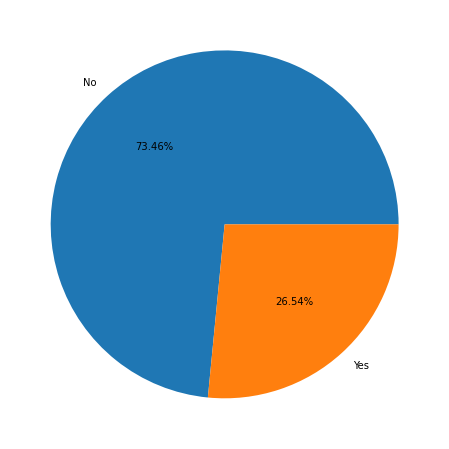

In [11]:
plt.figure(figsize=(10,8))
plt.pie(data['ChurnLabel'].value_counts(), labels=data['ChurnLabel'].unique(), autopct='%.2f%%')
plt.show()

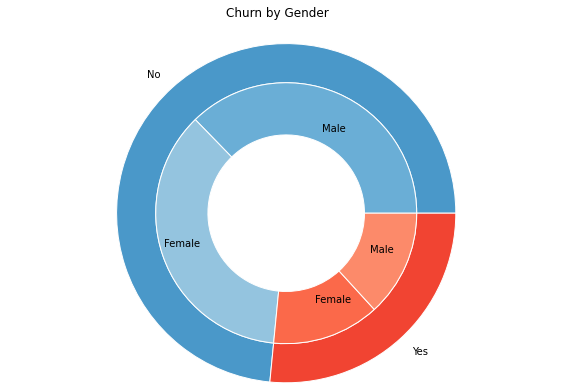

In [12]:
by_gender = data.groupby('ChurnLabel')['Gender'].value_counts().to_frame().rename(columns={'Gender': 'Freq'}).reset_index().sort_values('ChurnLabel')

# Make data: I have 3 groups and 7 subgroups
group_names=data['ChurnLabel'].value_counts().index
group_size=data['ChurnLabel'].value_counts()
subgroup_names=by_gender['Gender']
subgroup_size=by_gender['Freq']
 
# Create colors
a, b =[plt.cm.Blues, plt.cm.Reds]

# First Ring (outside)
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Churn by Gender')
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()

In [13]:
data.groupby('ChurnLabel')['Gender'].value_counts(normalize=True).to_frame().rename(columns={'Gender': 'Ratio'}).reset_index().sort_values('ChurnLabel')

,ChurnLabel,Gender,Ratio
0,No,Male,0.507344
1,No,Female,0.492656
2,Yes,Female,0.502408
3,Yes,Male,0.497592


#### Remarque : 
À partir de la visualisation ci-dessus, nous pouvons voir que la proportion d'hommes et de femmes à désabonnement ou à conserver est presque la même.

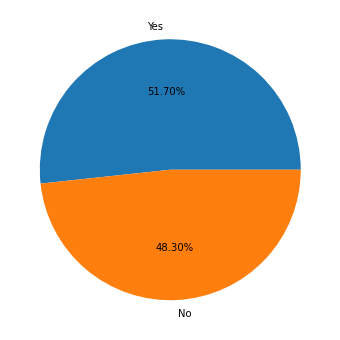

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(data['MaritalStatus'].value_counts(), labels=data['MaritalStatus'].unique(), autopct='%.2f%%')
plt.show()


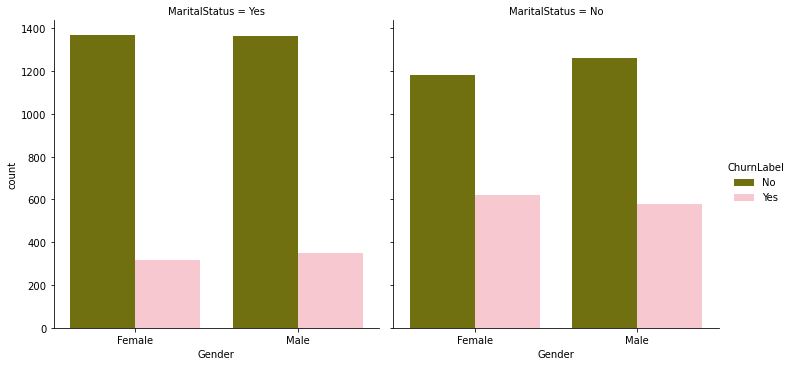

In [15]:
sns.catplot(x='Gender', hue='ChurnLabel', col='MaritalStatus', kind='count', data=data,palette=sns.color_palette(['olive', 'pink']))


### Remraque :
D'après la visualisation ci-dessus, les femmes et les hommes qui ne sont pas marriés sont plus susceptibles de se désabonner.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


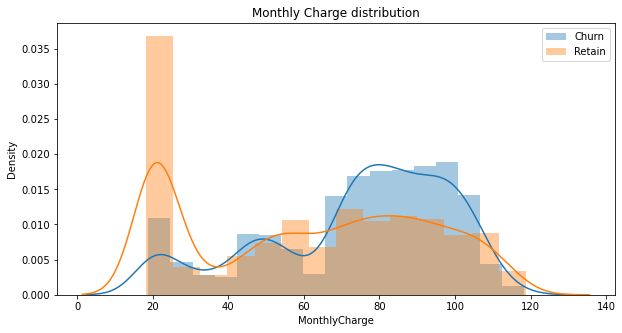

In [16]:
plt.figure(figsize=(10,5))
plt.title('Monthly Charge distribution')
sns.distplot(data[data['ChurnLabel'] == 'Yes']['MonthlyCharge'], label='Churn')
sns.distplot(data[data['ChurnLabel'] == 'No']['MonthlyCharge'], label='Retain')
plt.legend(loc= 'upper right')
plt.show()

#### Remarque : 
D'après la visualisation ci-dessus, les clients qui effectuent des transactions par mois en moyenne de plus de 60 $ seront plus susceptibles de se désabonner que la transaction moyenne inférieure.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

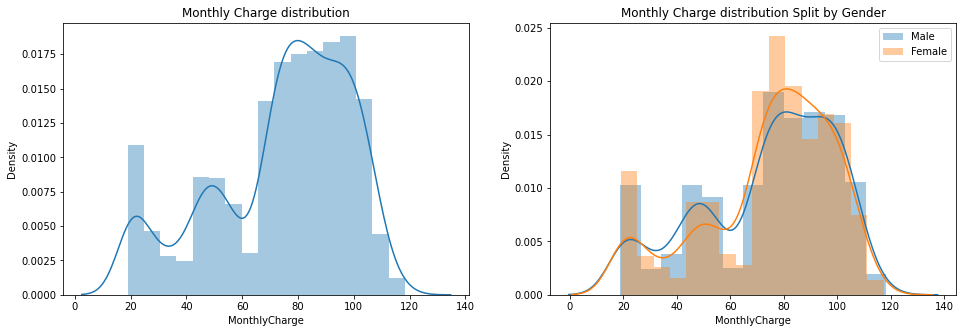

In [17]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Monthly Charge distribution')
sns.distplot(data[data['ChurnLabel'] == 'Yes']['MonthlyCharge'], label='Churn')
plt.subplot(1,2,2)
plt.title('Monthly Charge distribution Split by Gender')
sns.distplot(data[(data['ChurnLabel'] == 'Yes') & (data['Gender'] == 'Male')]['MonthlyCharge'], label='Male')
sns.distplot(data[(data['ChurnLabel'] == 'Yes') & (data['Gender'] == 'Female')]['MonthlyCharge'], label='Female')
plt.legend()
plt.show()

#### Remarque : 
Les chances de désabonnement entre les hommes et les femmes sont presque les mêmes à tous les niveaux de frais mensuels.

Text(0.5, 1.0, 'Use of services')

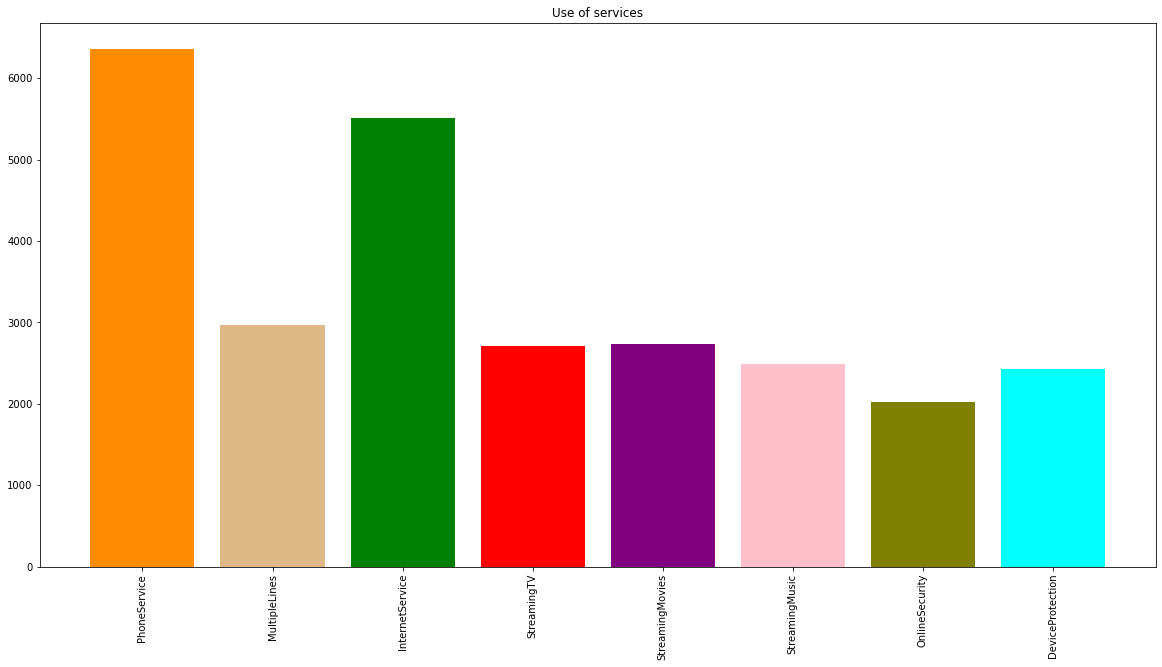

In [18]:
services = [
sum(data['PhoneService']),sum(data['MultipleLines']),
    sum(data['InternetService']),sum(data['StreamingTV']),
    sum(data['StreamingMovies']),sum(data['StreamingMusic']),
    sum(data['OnlineSecurity']),sum(data['DeviceProtection'])]


services_name = ['PhoneService','MultipleLines', 'InternetService',
            'StreamingTV',  'StreamingMovies', 
            'StreamingMusic', 'OnlineSecurity','DeviceProtection']

plt.figure(figsize=(20,10))

plt.bar(range(len(services)), services, color = ['darkorange','burlywood','green','red','purple','pink','olive','cyan' ])
plt.xticks(range(len(services)), services_name, rotation=90)
plt.title('Use of services')

#### Les service phone et internet sont les plus utilisés par les clients.

Text(0.5, 1.0, 'Use of services')

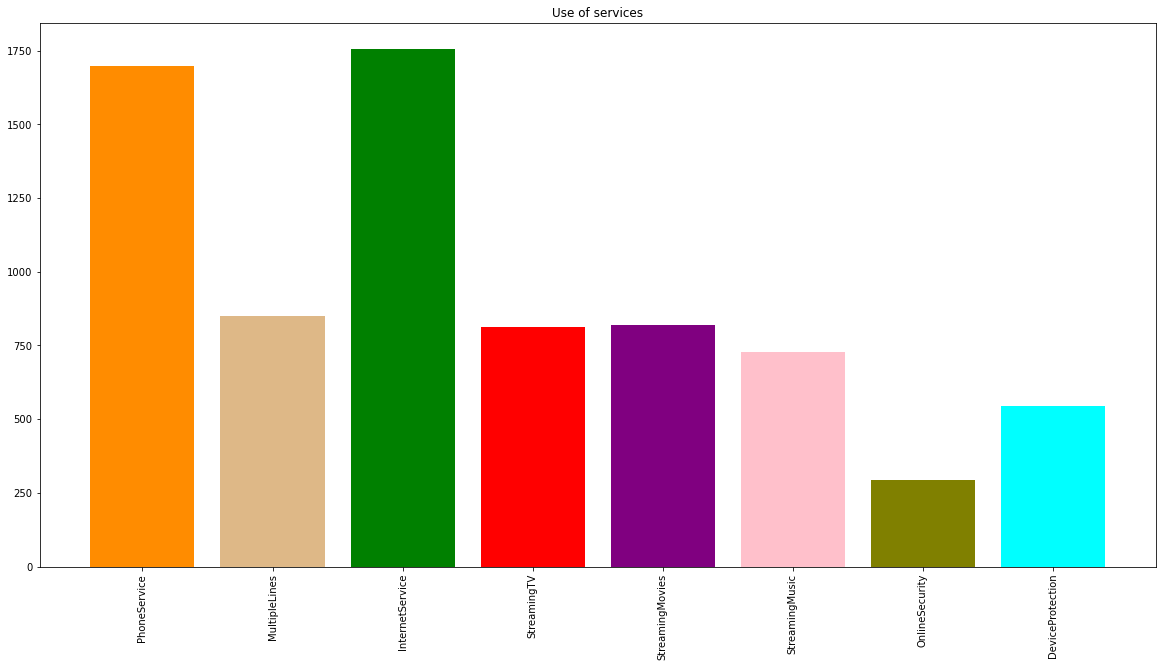

In [19]:
df = data[data['ChurValue']==1][['PhoneService','MultipleLines', 'InternetService','StreamingTV',  'StreamingMovies',
                                'StreamingMusic', 'OnlineSecurity','DeviceProtection']]
services = [
sum(df['PhoneService']),sum(df['MultipleLines']),
    sum(df['InternetService']),sum(df['StreamingTV']),
    sum(df['StreamingMovies']),sum(df['StreamingMusic']),
    sum(df['OnlineSecurity']),sum(df['DeviceProtection'])]



services_name = ['PhoneService','MultipleLines', 'InternetService',
            'StreamingTV',  'StreamingMovies', 
            'StreamingMusic', 'OnlineSecurity','DeviceProtection']

plt.figure(figsize=(20,10))

plt.bar(range(len(services)), services, color = ['darkorange','burlywood','green','red','purple','pink','olive','cyan' ])
plt.xticks(range(len(services)), services_name, rotation=90)
plt.title('Use of services')

#### Le taux de désabonnement est plus élevé dans le service internet puis le service phone. Il se peut que la qualité de ces deux services est médiocre.

In [20]:
pd.crosstab(data['PaymentMethod'], data['ChurnLabel'], normalize=0)

ChurnLabel,No,Yes
PaymentMethod,,
Bank Withdrawal,0.660015,0.339985
Credit Card,0.855220,0.144780
Mailed Check,0.631169,0.368831


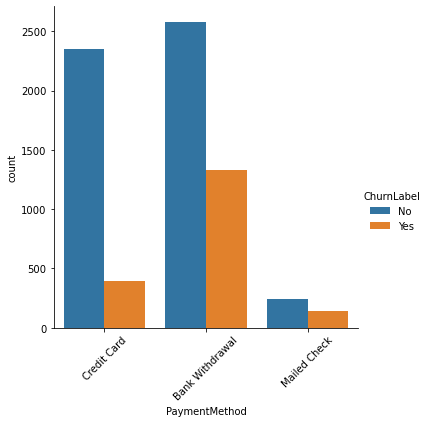

In [21]:
sns.catplot(x='PaymentMethod', hue='ChurnLabel', kind='count', data=data)
plt.xticks(rotation=45)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


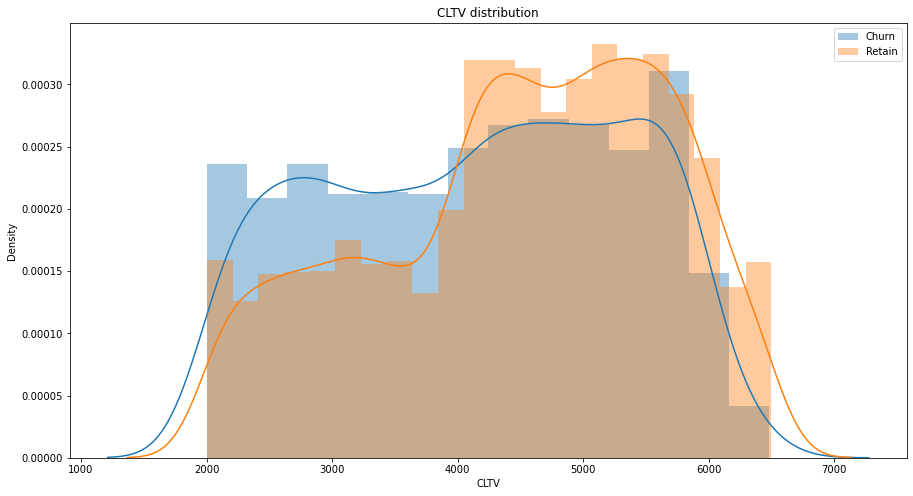

In [40]:
plt.figure(figsize=(15,8))
plt.title('CLTV distribution')
sns.distplot(data[data['ChurnLabel'] == 'Yes']['CLTV'], label='Churn')
sns.distplot(data[data['ChurnLabel'] == 'No']['CLTV'], label='Retain')
plt.legend(loc= 'upper right')
plt.show()

#### Les clients avec un CLTV plus de 4000 sont plus susceptible de conserver l'abonnement.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-

Text(0.5, 1.0, 'churn by DeviceProtection')

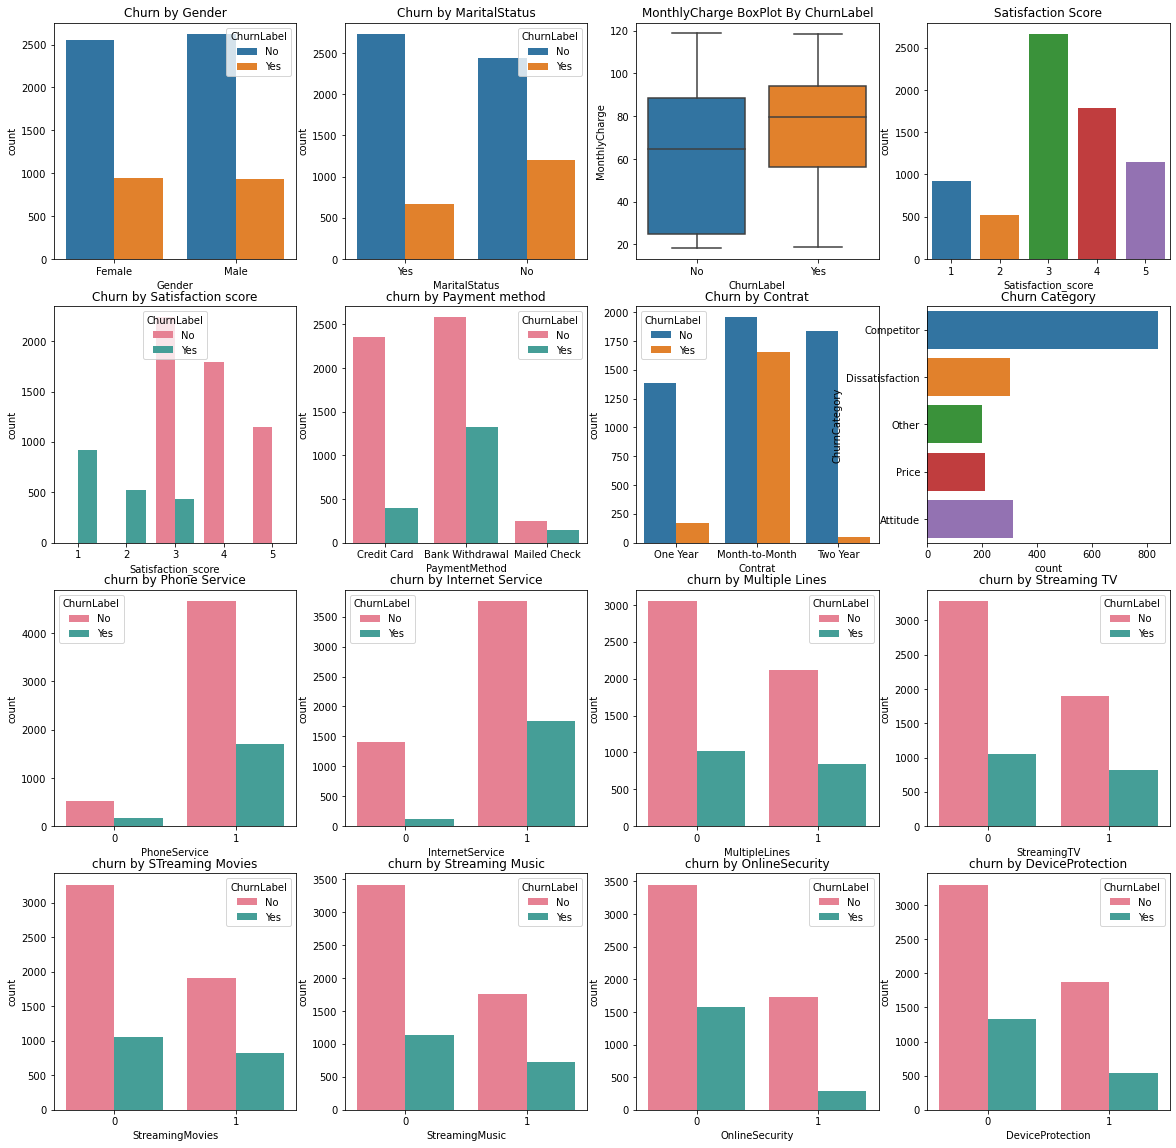

In [41]:
f,ax = plt.subplots(4,4,figsize=(20,20))
sns.countplot('Gender',hue='ChurnLabel',data=data,ax=ax[0,0])
sns.countplot('MaritalStatus',hue='ChurnLabel',data=data,ax=ax[0,1])
sns.boxplot(x='ChurnLabel',y='MonthlyCharge',data=data,ax=ax[0,2])

sns.countplot('Satisfaction_score',data=data,ax=ax[0,3])
sns.countplot('Satisfaction_score',hue='ChurnLabel',data=data,ax=ax[1,0],palette='husl')



sns.countplot('PaymentMethod',hue='ChurnLabel',data=data,ax=ax[1,1],palette='husl')
sns.countplot('Contrat',hue='ChurnLabel',data=data, ax=ax[1,2])
sns.countplot(y ='ChurnCategory',data=data[data['ChurnLabel']=='Yes'], ax=ax[1,3])

sns.countplot('PhoneService',hue='ChurnLabel',data=data,ax=ax[2,0],palette='husl')
sns.countplot('InternetService',hue='ChurnLabel',data=data,ax=ax[2,1],palette='husl')
sns.countplot('MultipleLines',hue='ChurnLabel',data=data,ax=ax[2,2],palette='husl')
sns.countplot('StreamingTV',hue='ChurnLabel',data=data,ax=ax[2,3],palette='husl')
sns.countplot('StreamingMovies',hue='ChurnLabel',data=data,ax=ax[3,0],palette='husl')
sns.countplot('StreamingMusic',hue='ChurnLabel',data=data,ax=ax[3,1],palette='husl')
sns.countplot('OnlineSecurity',hue='ChurnLabel',data=data,ax=ax[3,2],palette='husl')
sns.countplot('DeviceProtection',hue='ChurnLabel',data=data,ax=ax[3,3],palette='husl')



ax[0,0].set_title('Churn by Gender')
ax[0,1].set_title('Churn by MaritalStatus')
ax[0,2].set_title('MonthlyCharge BoxPlot By ChurnLabel')
ax[0,3].set_title('Satisfaction Score')
ax[1,0].set_title('Churn by Satisfaction score')
ax[1,1].set_title('churn by Payment method')
ax[1,2].set_title('Churn by Contrat')
ax[1,3].set_title('Churn Category')

ax[2,0].set_title('churn by Phone Service')
ax[2,1].set_title('churn by Internet Service')
ax[2,2].set_title('churn by Multiple Lines')
ax[2,3].set_title('churn by Streaming TV')
ax[3,0].set_title('churn by STreaming Movies')
ax[3,1].set_title('churn by Streaming Music')
ax[3,2].set_title('churn by OnlineSecurity')
ax[3,3].set_title('churn by DeviceProtection')


Text(0.5, 1.0, 'Gender & Contract\n ')

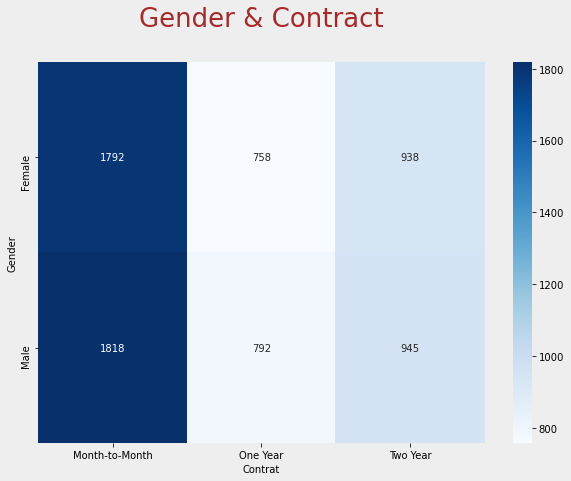

In [23]:
plt.figure(figsize=(10,7),facecolor='#eeeeee')
sns.heatmap(pd.crosstab(data.Gender,data.Contrat),annot=True,fmt="d",cmap="Blues")
plt.title('Gender & Contract\n ',fontsize=26,color='brown')

Text(0.5, 1.0, 'Gender & PaymentMethod\n ')

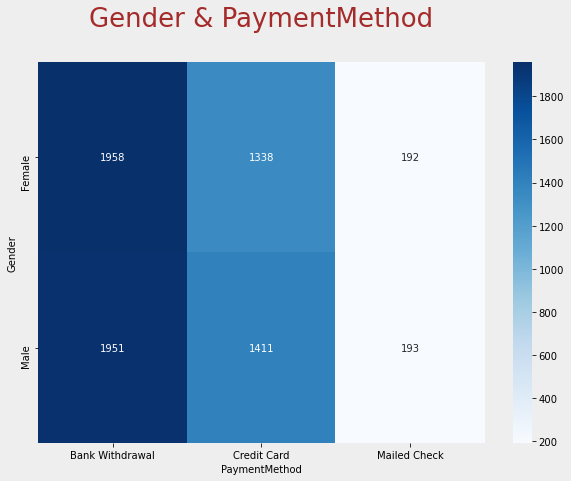

In [24]:
plt.figure(figsize=(10,7),facecolor='#eeeeee')
sns.heatmap(pd.crosstab(data.Gender,data.PaymentMethod),annot=True,fmt="d",cmap="Blues")
plt.title('Gender & PaymentMethod\n ',fontsize=26,color='brown')

Text(0.5, 1.0, 'MaritalStatus & Contrat\n ')

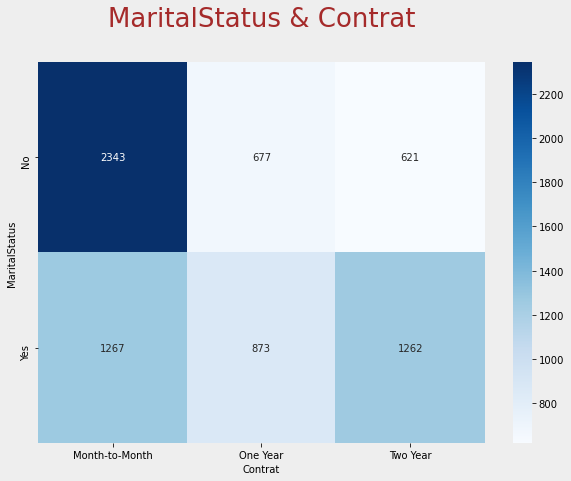

In [25]:
plt.figure(figsize=(10,7),facecolor='#eeeeee')
sns.heatmap(pd.crosstab(data.MaritalStatus,data.Contrat),annot=True,fmt="d",cmap="Blues")
plt.title('MaritalStatus & Contrat\n ',fontsize=26,color='brown')

## Data preprocessing

In [28]:
data2 = data.drop(['SubscriptionDate','CustomerID','ChurnLabel', 
                   'ChurnScore', 'CLTV', 'ChurnCategory','SubsciptionMonths',
                  'SubscriptionQuarter','ChurnDate','CustomerStatus',
                  'InternetType','State'],axis=1).copy()

#### Feature Engineering

In [29]:

data2 = pd.concat([data2, pd.get_dummies(data2.Contrat, prefix='Contract')], axis=1)
data2 = pd.concat([data2, pd.get_dummies(data2.PaymentMethod, prefix='PaymentMethod')], axis=1)
data2 = pd.concat([data2, pd.get_dummies(data2.InternetService, prefix='InternetService')], axis=1)
data2.drop(['Contrat','PaymentMethod','InternetService'],axis = 1 ,inplace = True)


In [30]:
from sklearn.preprocessing import LabelEncoder
encodeur = LabelEncoder()
for col in data2.columns:
     if col in ['City','Gender','MaritalStatus', 'Partner','PhoneService','MultipleLines','OnlineSecurity',
                'DeviceProtection' ,  'StreamingTV', 'StreamingMovies', 'StreamingMusic']:
        data2[col] = encodeur.fit_transform(data2[col])

<AxesSubplot:>

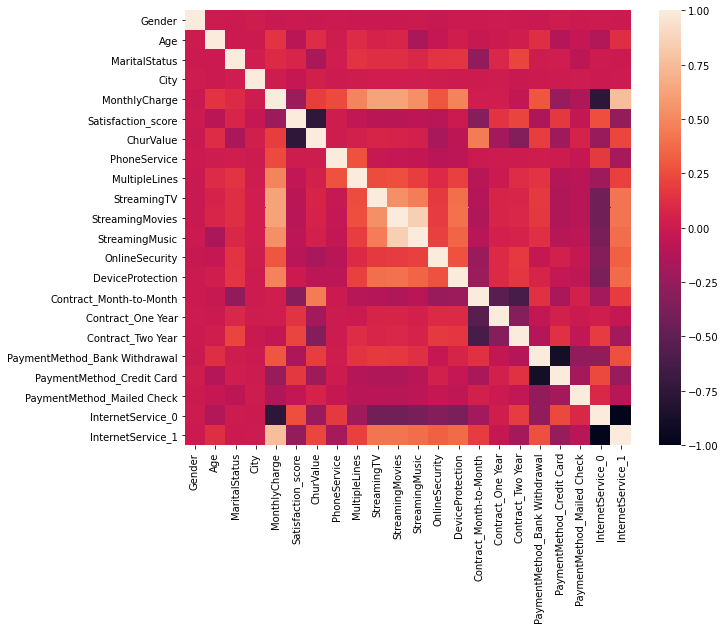

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(data2.corr())

  #### Corrélation avec la variable cible ( Churn Value )

<AxesSubplot:>

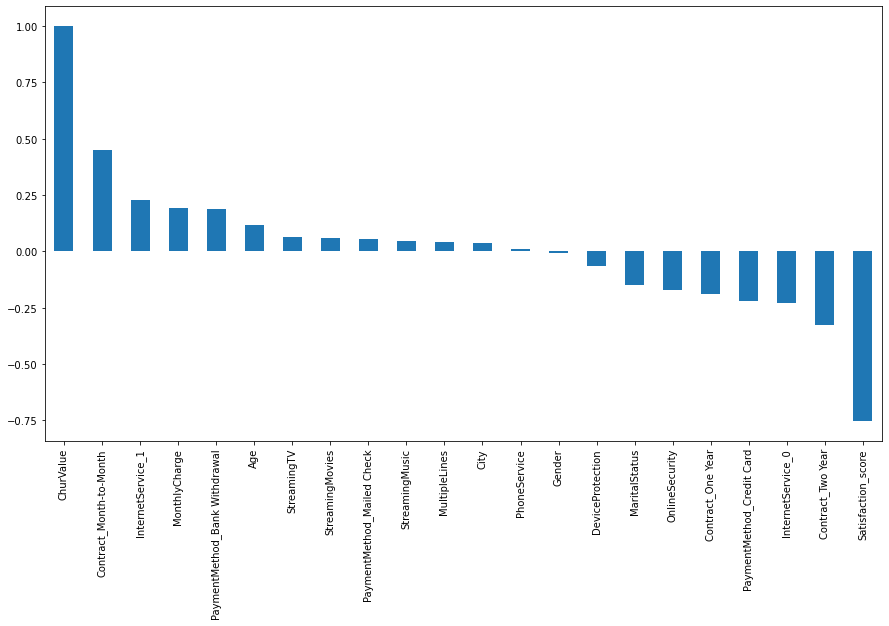

In [49]:

plt.figure(figsize=(15,8))
data2.corr()['ChurValue'].sort_values(ascending = False).plot(kind='bar')

### SelectKBest

,Score
Gender,0.258699
Age,569.265890
MaritalStatus,82.412083
City,1570.820753
Satisfaction_score,1784.607244
PhoneService,0.097261
MultipleLines,6.548512
StreamingTV,17.334235
StreamingMovies,16.242531
StreamingMusic,9.466142


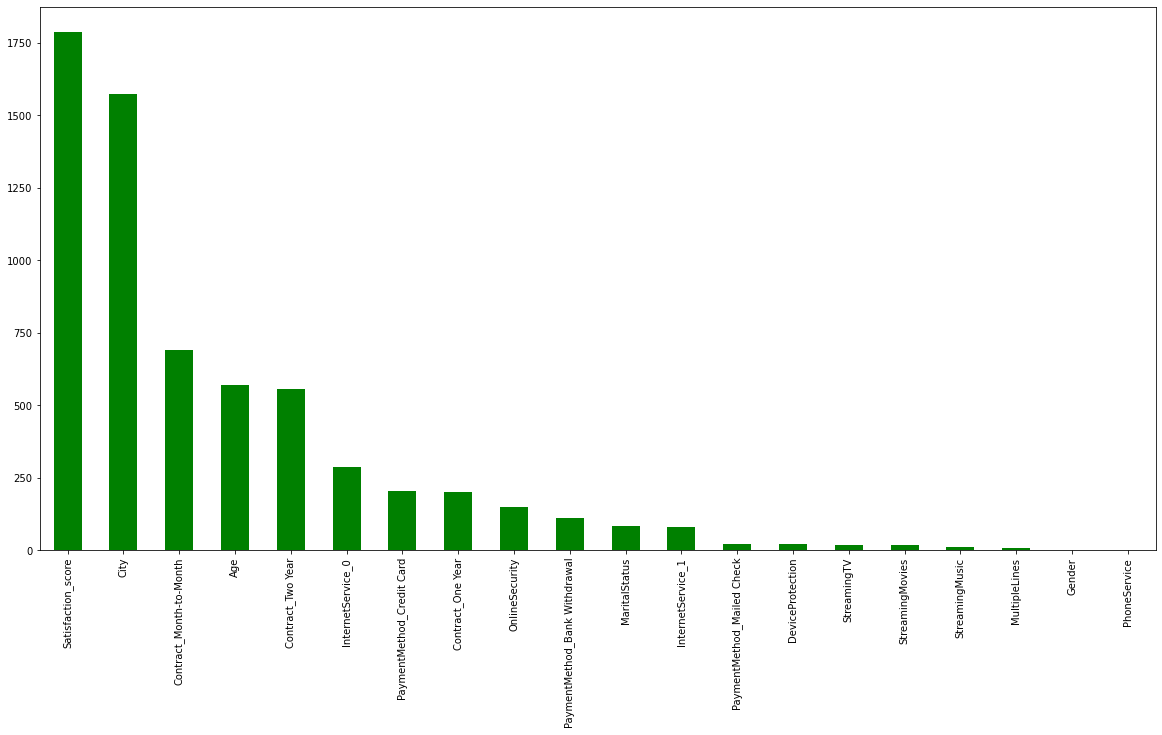

In [64]:
# SelectKBest avec le test Chi-square (categorial vs categorial)

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X_cat = data2.drop(['ChurValue','MonthlyCharge'],axis = 1)
Y_cat = data2.ChurValue
fs = SelectKBest(score_func = chi2, k="all")
X_f = fs.fit_transform(X_cat, Y_cat)
chi2_scores_df = pd.DataFrame(fs.scores_, index = X_cat.columns, columns= ['Score'])
chi2_scores_df['Score'].sort_values(ascending=False).plot.bar(figsize=(20,10), color = 'green')
chi2_scores_df

In [57]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X_cat = data2.drop(['ChurValue','MonthlyCharge'],axis = 1)
Y_cat = data2.ChurValue
fs = SelectKBest(score_func = chi2, k=5)
X_f = fs.fit_transform(X_cat, Y_cat)

X_best = fs.get_feature_names_out(X_cat.columns)
X_best = list(X_best)
X_best

['Age',
 'City',
 'Satisfaction_score',
 'Contract_Month-to-Month',
 'Contract_Two Year']

In [58]:
X = data2[X_best+['MonthlyCharge']]
y=data2.ChurValue

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=.2, stratify=y)

In [59]:
model = LogisticRegression(random_state=42, max_iter =10000)
model.fit(X_train_val,y_train_val)

LogisticRegression(max_iter=10000, random_state=42)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(X_test))

0.936124911284599

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1035
           1       1.00      0.76      0.86       374

    accuracy                           0.94      1409
   macro avg       0.96      0.88      0.91      1409
weighted avg       0.94      0.94      0.93      1409



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x720 with 0 Axes>

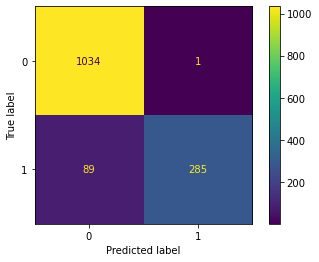

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

plt.figure(figsize=(10,10))
plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test,model.predict(X_test)))